# Предсказания результатов экзаменов учащихся

## Цели и задачи

Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска

Для этого провести анализ статистических данных и сделать выводы

### Исходные данные

In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк

sm = pd.read_csv('stud_math.csv')
display(sm.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


### Описание данные

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

In [299]:
## заменим наименование столбцов, для большей информативности
sm.columns = ['school', 'sex', 'age', 'address', 'family_size', 'parent_status', 'mother_edu', 
              'father_edu', 'mother_job', 'father_job', 'reason', 'guardian', 'traveltime', 
              'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
              'studytime2', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 
              'absences', 'score']

## Первичная обработка

In [300]:
sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   school         395 non-null    object 
 1   sex            395 non-null    object 
 2   age            395 non-null    int64  
 3   address        378 non-null    object 
 4   family_size    368 non-null    object 
 5   parent_status  350 non-null    object 
 6   mother_edu     392 non-null    float64
 7   father_edu     371 non-null    float64
 8   mother_job     376 non-null    object 
 9   father_job     359 non-null    object 
 10  reason         378 non-null    object 
 11  guardian       364 non-null    object 
 12  traveltime     367 non-null    float64
 13  studytime      388 non-null    float64
 14  failures       373 non-null    float64
 15  schoolsup      386 non-null    object 
 16  famsup         356 non-null    object 
 17  paid           355 non-null    object 
 18  activities

Итого мы видим:
* числовых параметров - 13,
* строковы (иных) - 17

Всего записей - 395

Только первые три колонки (school, age, sex) не имеют пустых значений
Так как целевой параметр score, то есть смысл удалить данные, в которых score неопределен

In [301]:
sm = sm[sm['score'].notnull()]

Посмотрим значения колонок номинативных параметров, чтобы заполнить отсутствующие значения

In [302]:
display(sm.address.value_counts())
display(sm.family_size.value_counts())
display(sm.parent_status.value_counts())
display(sm.mother_job.value_counts())
display(sm.father_job.value_counts())
display(sm.guardian.value_counts())

U    291
R     83
Name: address, dtype: int64

GT3    255
LE3    107
Name: family_size, dtype: int64

T    308
A     36
Name: parent_status, dtype: int64

other       127
services     98
at_home      58
teacher      55
health       32
Name: mother_job, dtype: int64

other       194
services     99
teacher      29
at_home      16
health       15
Name: father_job, dtype: int64

mother    248
father     86
other      24
Name: guardian, dtype: int64

Для колонок 'guardian', 'mother_job', 'father_job' присутствует вариант 'other' поэтому отсутствующие значения вполне можно заменить на него

In [303]:
sm.mother_job = sm.mother_job.apply(lambda x: 'other' if x is np.nan else x)
sm.father_job = sm.father_job.apply(lambda x: 'other' if x is np.nan else x)
sm.guardian = sm.guardian.apply(lambda x: 'other' if x is np.nan else x)
sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   school         389 non-null    object 
 1   sex            389 non-null    object 
 2   age            389 non-null    int64  
 3   address        374 non-null    object 
 4   family_size    362 non-null    object 
 5   parent_status  344 non-null    object 
 6   mother_edu     386 non-null    float64
 7   father_edu     365 non-null    float64
 8   mother_job     389 non-null    object 
 9   father_job     389 non-null    object 
 10  reason         372 non-null    object 
 11  guardian       389 non-null    object 
 12  traveltime     361 non-null    float64
 13  studytime      382 non-null    float64
 14  failures       367 non-null    float64
 15  schoolsup      380 non-null    object 
 16  famsup         351 non-null    object 
 17  paid           350 non-null    object 
 18  activities

## Корреляционный анализ

Проверим корреляцию между числовыми параметрами в данных

In [304]:
sm.corr()

,age,mother_edu,father_edu,traveltime,studytime,failures,studytime2,famrel,freetime,goout,health,absences,score
age,1.000000,-0.146736,-0.132182,0.073146,-0.018227,0.205919,0.018227,0.060414,0.016099,0.121115,-0.068103,0.096628,-0.155726
mother_edu,-0.146736,1.000000,0.270754,-0.165838,0.081032,-0.240319,-0.081032,0.000602,0.038265,0.072320,-0.048331,-0.014047,0.213349
father_edu,-0.132182,0.270754,1.000000,0.038990,0.059618,-0.150023,-0.059618,0.045665,-0.062377,-0.019312,0.024861,0.003762,0.078573
traveltime,0.073146,-0.165838,0.038990,1.000000,-0.105910,0.049738,0.105910,-0.027395,-0.026299,0.032629,-0.011724,-0.048242,-0.070559
studytime,-0.018227,0.081032,0.059618,-0.105910,1.000000,-0.181947,-1.000000,0.046249,-0.125066,-0.053831,-0.079180,-0.025707,0.115741
failures,0.205919,-0.240319,-0.150023,0.049738,-0.181947,1.000000,0.181947,-0.034836,0.091608,0.107747,0.088013,0.058166,-0.344338
studytime2,0.018227,-0.081032,-0.059618,0.105910,-1.000000,0.181947,1.000000,-0.046249,0.125066,0.053831,0.079180,0.025707,-0.115741
famrel,0.060414,0.000602,0.045665,-0.027395,0.046249,-0.034836,-0.046249,1.000000,0.174193,0.076387,0.080089,-0.082489,0.057112
freetime,0.016099,0.038265,-0.062377,-0.026299,-0.125066,0.091608,0.125066,0.174193,1.000000,0.296338,0.064315,0.010745,0.019026
goout,0.121115,0.072320,-0.019312,0.032629,-0.053831,0.107747,0.053831,0.076387,0.296338,1.000000,-0.018026,-0.047954,-0.129685


Видим, что данные в 'studytime' и 'studytime2' полностью коррелируются друг с другом. 
Поэтому второй  столбец можно удалить

In [305]:
sm.drop(['studytime2'], inplace = True, axis = 1)

Также видно что ряд числовых параметров фактически (<0) не влияют на параметр score
* age (возраст)
* traveltime (время в путо до школы)
* failures (количество неудач вне школы)
* goout (проведенное время с друзьями)
* health (уровнь здоровья)

In [306]:
sm.drop(['age','traveltime','failures','goout','health'], inplace = True, axis = 1)
display(sm.head(10))

,school,sex,address,family_size,parent_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,absences,score
0,GP,F,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,6.0,30.0
1,GP,F,U,GT3,NaN,1.0,1.0,at_home,other,course,father,2.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,4.0,30.0
2,GP,F,U,LE3,T,1.0,1.0,at_home,other,other,mother,2.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,10.0,50.0
3,GP,F,U,GT3,T,4.0,2.0,health,other,home,mother,3.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,75.0
4,GP,F,U,GT3,T,3.0,3.0,other,other,home,father,2.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,4.0,50.0
5,GP,M,U,LE3,T,4.0,3.0,services,other,reputation,mother,2.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,10.0,75.0
6,GP,M,NaN,LE3,T,2.0,2.0,other,other,home,mother,2.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,0.0,55.0
7,GP,F,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,6.0,30.0
8,GP,M,U,LE3,A,3.0,2.0,services,other,home,mother,2.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,0.0,95.0
9,GP,M,U,NaN,NaN,3.0,4.0,other,other,home,mother,2.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,0.0,75.0


Посмотрим распределение числовых парамеров

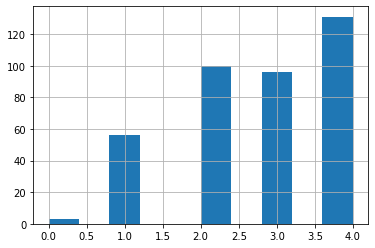

In [307]:
## уровень образования матери
sm.mother_edu.hist()

2.0     105
3.0      94
4.0      88
1.0      75
0.0       2
40.0      1
Name: father_edu, dtype: int64

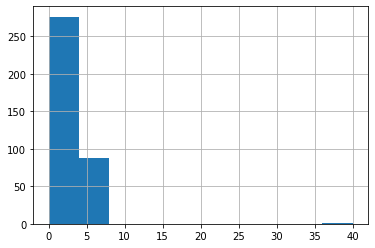

In [308]:
## уровень образования отца
sm.father_edu.hist()
display(sm.father_edu.value_counts())

Видим, что в уровне образования отца, есть одно ошибочное значение.
Можем предположить, то значение 40 это значение 4, заменим его

In [309]:
sm[sm['father_edu']==40]

,school,sex,address,family_size,parent_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,absences,score
11,GP,F,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,no,yes,no,yes,yes,yes,yes,no,5.0,2.0,4.0,60.0


In [310]:
sm.loc[11, 'father_edu'] = 4

2.0    189
1.0    103
3.0     63
4.0     27
Name: studytime, dtype: int64

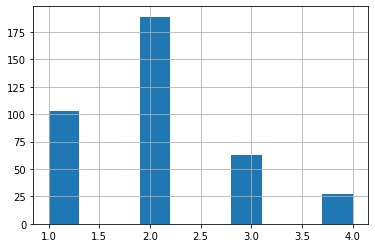

In [311]:
## время на учёбу вне школы
sm.studytime.hist()
display(sm.studytime.value_counts())

 4.0    178
 5.0     97
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

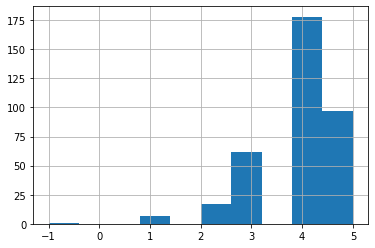

In [312]:
## уровень образования отца
sm.famrel.hist()
display(sm.famrel.value_counts())

In [313]:
sm[sm['famrel']==-1]

,school,sex,address,family_size,parent_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,absences,score
25,GP,F,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,14.0,40.0


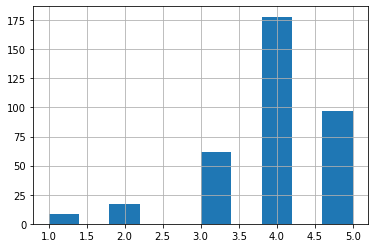

In [314]:
sm.loc[25, 'famrel'] = 1
sm.famrel.hist()

count    378.000000
mean       7.320106
std       23.615525
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


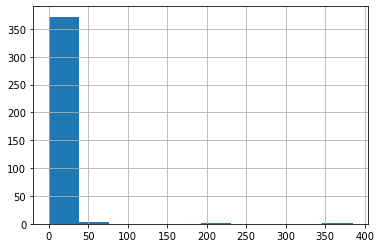

In [315]:
## уровень образования отца
sm.absences.hist()
display(sm.absences.describe())
perc25 = sm.absences.quantile(0.25)
perc75 = sm.absences.quantile(0.75)
IQR = perc75 - perc25

 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Судя по распределению данных в поле 'количество пропущенных занятий' (absences) есть выбросы, которые следует исключить

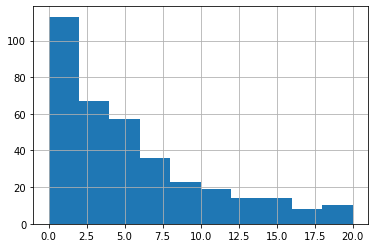

In [316]:
sm = sm[sm.absences<=20]
sm.absences.hist()

count    361.000000
mean      51.994460
std       22.956117
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


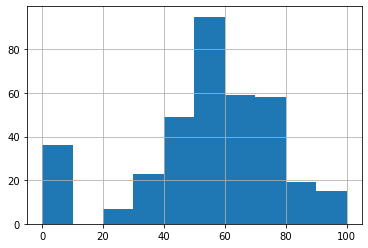

In [317]:
sm.score.hist()
display(sm.score.describe())
perc25 = sm.score.quantile(0.25)
perc75 = sm.score.quantile(0.75)
IQR = perc75 - perc25

 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Судя по гистограмме слева есть явно выпадающие значения, то есть примерно около 40 строк в данных имеют оценку по госэкзамену = 0, хотя нулевые значения входят в границы выборосов. 

Для окончательного решения по удалению из выборки нулевых значений, посмотрим на зависимость оценки от количества пропущенных занятий

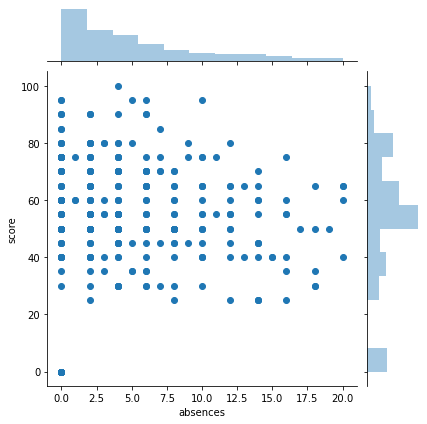

In [318]:
sns.jointplot(x='absences', y='score', data=sm)

Здес видно что значение оценки 0, имеют только те студенты, кто ниразу не пропускал занятия, а те, кто пропускал занятия даже больше 10 занятий, не имеют значений 0.
Отсюда можно сделать оценки 0 в данной выборке исключить

count    325.000000
mean      57.753846
std       15.870843
min       25.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

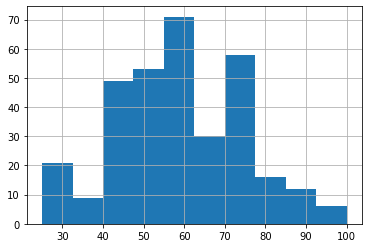

In [319]:
sm = sm[sm.score>0]
sm.score.hist()
display(sm.score.describe())

## Анализ категориальных переменных

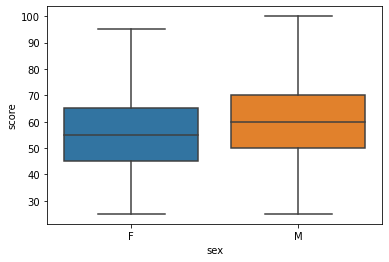

In [320]:
## зависимость от пола
sns.boxplot(x='sex', y='score', data=sm)

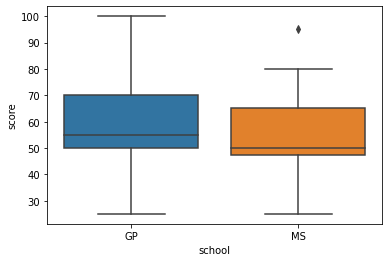

In [321]:
## зависимость от школы
sns.boxplot(x='school', y='score', data=sm)

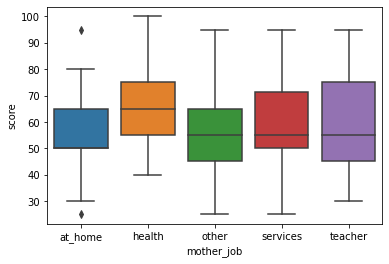

In [322]:
## зависимость от проффесиальной деятельности матери
sns.boxplot(x='mother_job', y='score', data=sm)

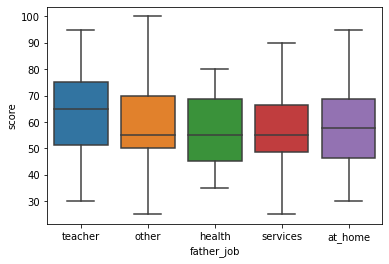

In [323]:
## зависимость от проффесиальной деятельности отца
sns.boxplot(x='father_job', y='score', data=sm)

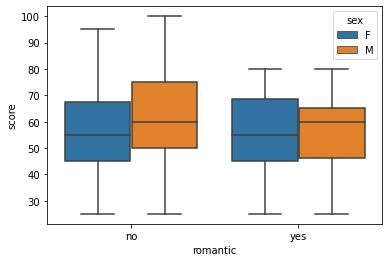

In [324]:
## зависимость от наличия романтически отношений с учетом пола
sns.boxplot(x='romantic',  y='score', data=sm, hue='sex')

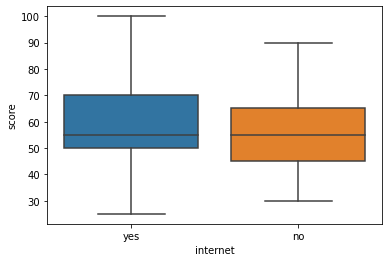

In [325]:
## зависимость от наличия интернета
sns.boxplot(x='internet',  y='score', data=sm)

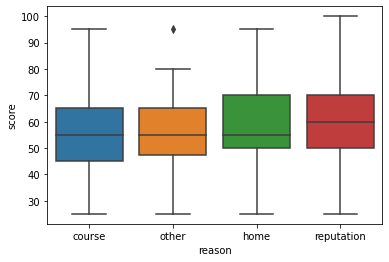

In [326]:
## зависимость от причины выбора школы
sns.boxplot(x='reason',  y='score', data=sm)

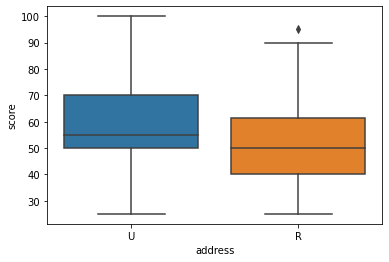

In [327]:
## зависимость от проживания в городе/за городом
sns.boxplot(x='address',  y='score', data=sm)

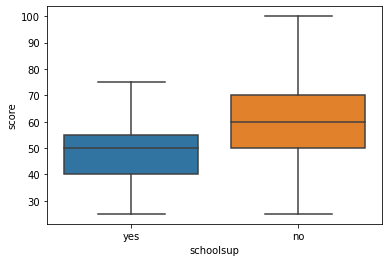

In [328]:
## зависимость от доп образовательного процесса
sns.boxplot(x='schoolsup',  y='score', data=sm)

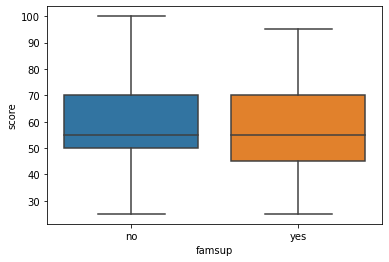

In [329]:
## зависимость от семейное образовательная поддержка
sns.boxplot(x='famsup',  y='score', data=sm)

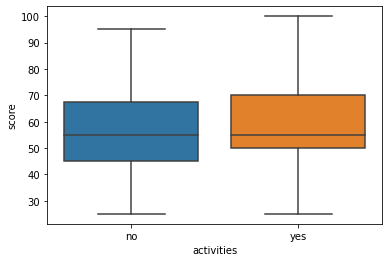

In [330]:
## зависимость от активности вне школы
sns.boxplot(x='activities',  y='score', data=sm)

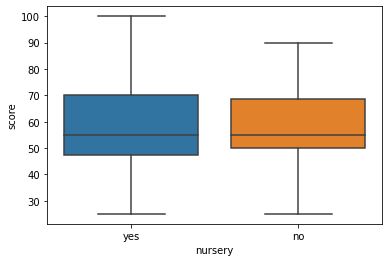

In [331]:
## зависимость от посещения детского сада
sns.boxplot(x='nursery',  y='score', data=sm)

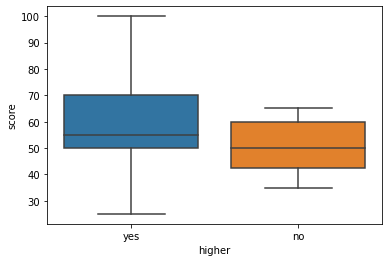

In [332]:
## зависимость от желания учиться в вузе
sns.boxplot(x='higher',  y='score', data=sm)

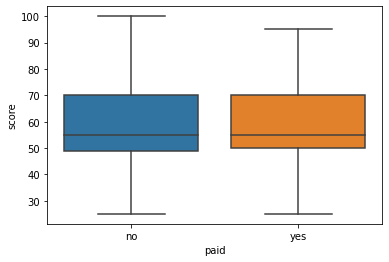

In [333]:
## зависимость от доп платного образования
sns.boxplot(x='paid',  y='score', data=sm)

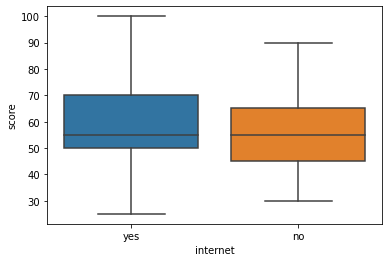

In [334]:
## зависимость от доступа к интернету
sns.boxplot(x='internet',  y='score', data=sm)

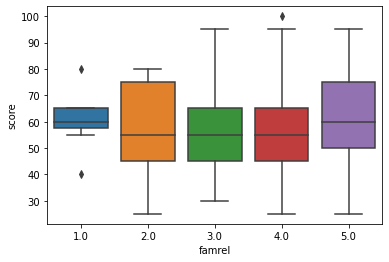

In [335]:
## зависимость от отношений в семье
sns.boxplot(x='famrel',  y='score', data=sm) 

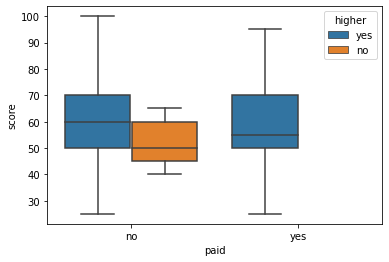

In [336]:
## зависимость от наличия доп платного обучения и желания продолжить обучение в вузах
sns.boxplot(x='paid',  y='score', data=sm, hue='higher')

Итого можно сделать вывод, что по следующим категориальным признакам, какой-либо явной корреляции с оценкой нет:
    * paid (дополнительное платное образовательное)
    * nursery (посещение десткого сада)
    * reason (причины выбора школы)

In [337]:
sm.drop(['paid','nursery','reason'], inplace = True, axis = 1)
display(sm.head(10))

,school,sex,address,family_size,parent_status,mother_edu,father_edu,mother_job,father_job,guardian,studytime,schoolsup,famsup,activities,higher,internet,romantic,famrel,freetime,absences,score
0,GP,F,U,NaN,A,4.0,4.0,at_home,teacher,mother,2.0,yes,no,no,yes,NaN,no,4.0,3.0,6.0,30.0
1,GP,F,U,GT3,NaN,1.0,1.0,at_home,other,father,2.0,no,yes,no,yes,yes,no,5.0,3.0,4.0,30.0
2,GP,F,U,LE3,T,1.0,1.0,at_home,other,mother,2.0,yes,no,no,yes,yes,NaN,4.0,3.0,10.0,50.0
3,GP,F,U,GT3,T,4.0,2.0,health,other,mother,3.0,no,yes,yes,yes,yes,yes,3.0,2.0,2.0,75.0
4,GP,F,U,GT3,T,3.0,3.0,other,other,father,2.0,no,yes,no,yes,no,no,4.0,3.0,4.0,50.0
5,GP,M,U,LE3,T,4.0,3.0,services,other,mother,2.0,no,yes,yes,yes,yes,no,5.0,4.0,10.0,75.0
6,GP,M,NaN,LE3,T,2.0,2.0,other,other,mother,2.0,no,no,no,yes,yes,no,4.0,4.0,0.0,55.0
7,GP,F,U,GT3,A,4.0,4.0,other,teacher,mother,2.0,yes,yes,no,yes,no,no,4.0,1.0,6.0,30.0
8,GP,M,U,LE3,A,3.0,2.0,services,other,mother,2.0,no,yes,no,yes,yes,no,NaN,2.0,0.0,95.0
9,GP,M,U,NaN,NaN,3.0,4.0,other,other,mother,2.0,no,yes,yes,yes,yes,no,5.0,5.0,0.0,75.0


## Дополнительные оценки зависимости по количественным признакам

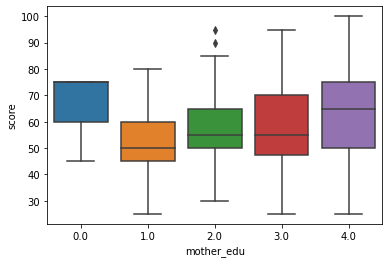

In [338]:
## Зависимость оценки от уровня образования матери
sns.boxplot(x='mother_edu', y='score', data=sm)

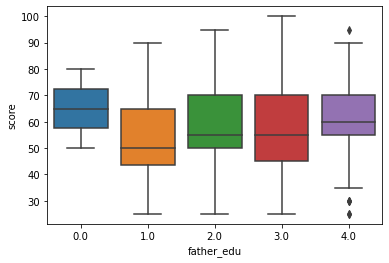

In [339]:
## Зависимость оценки от уровня образования отца
sns.boxplot(x='father_edu', y='score', data=sm)

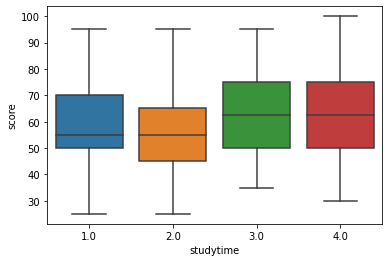

In [340]:
## Зависимость оценки от времени учебы вне школы
sns.boxplot(x='studytime', y='score', data=sm)

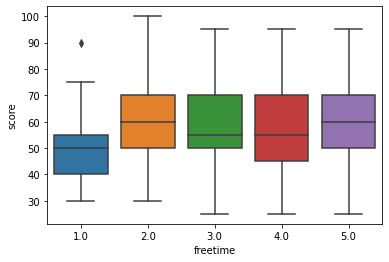

In [341]:
## Зависимость оценки от количества свободного времени
sns.boxplot(x='freetime', y='score', data=sm)

## Выводы

Исходя из полученных зависимостей, корреляции и прочего можно сделать следующие выводы

К группе риска (наибольшая вероятность получения минимальной оценки) относятся учащиеся:
* студенты проживающие вне города
* имеющих мало свободного времени (то есть фактически малоотдыхающие)
* а также те, кто имеют тенденцию прогуливать занятия

Что помогает повысить уровень оценки на госэкзамене
* наличие дополнительного образовательного процесса
* обучение в школе GP
* если мать имеет высокий уровень образование (тут можно сделать вывод такой, что обычно образование ребенка в семье занимаются матери, и во многои уровень успеваемости ребенка напрямую зависит от уровня образования матери

На что следует обратить внимание
* успеваемость студента-юноши резко падает при наличии романтических отношений, что нельзя сказать о студентах-девушках
* если студент изначально планирует обучение в вузе, то его оценки на госэкзамене по математики будет выше, скорее всего из-за того что у студентов есть большая мотивация
* доступ к интернету позволяет боьшему к